In [1]:
import pandas as pd

orders = pd.read_csv('./data/Orders.csv')
returns = pd.read_csv('./data/Returns.csv')
pd.set_option('display.max_columns', None)

In [2]:
orders.Profit = orders.Profit.replace('[\$,]', '', regex=True).astype(float)
orders.Sales = orders.Sales.replace('[\$,]', '', regex=True).astype(float)

In [3]:
orders.head(10)
# returns.head(10)
# orders['Order.ID']
orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month

In [4]:
def month_to_season(month):
  if month in [3,4,5]:
    month = 'spring'
  elif month in [6,7,8]:
    month = 'summer'
  elif month in [9,10,11]:
    month = 'fall'
  else:
    month = 'winter'
  return(month)

In [5]:
orders['season'] = orders.Month.apply(month_to_season)

In [6]:
season_category = orders.groupby(['season','Category']).agg({'Row.ID':'count', 'Profit':'sum'})

In [7]:
season_category = season_category.reset_index()

In [40]:
# season_category = season_category.set_index('season')
season_category

,season,Category,Row.ID,Profit
0,fall,Furniture,3347,113388.94
1,fall,Office Supplies,10170,163654.58
2,fall,Technology,3308,227549.67
3,spring,Furniture,1856,41635.46
4,spring,Office Supplies,6054,104256.93
5,spring,Technology,1916,126773.70
6,summer,Furniture,2488,63350.29
7,summer,Office Supplies,8381,136797.00
8,summer,Technology,2693,175576.04
9,winter,Furniture,2169,66707.93


In [41]:
season_category[season_category.Category =='Furniture'].plot.bar()

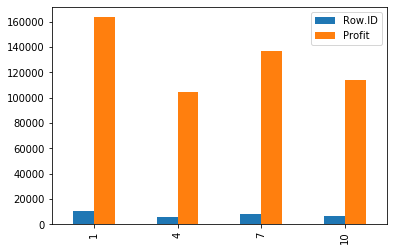

In [42]:
season_category[season_category.Category =='Office Supplies'].plot.bar()

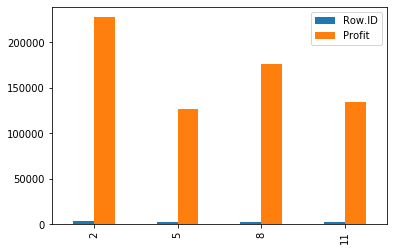

In [43]:
season_category[season_category.Category =='Technology'].plot.bar()

Furniture category had a slight drop in sales in spring and summer, but overall all categories followed a similar trend from overall (Winter < Spring < Summer < Fall)

In [6]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Month', 'season'],
      dtype='object')

# Problem 3: Why Did Customers Make Returns? 

### *Question 1: How much profit did we lose due to returns each year?*

In [45]:
returns = returns.rename(columns={'Order ID': 'Order.ID'})

In [46]:
losses = pd.merge(orders, returns, on='Order.ID')

In [47]:
losses['Year'] = pd.DatetimeIndex(losses['Order.Date']).year

In [14]:
pd.set_option('display.max_rows', None)
losses

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,season,Returned,Region_y,Year
0,30191,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-TA-5060,Furniture,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.000,720.36,725.570,Critical,12,winter,Yes,Eastern Asia,2012
1,30190,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-BO-5762,Furniture,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.000,153.75,627.270,Critical,12,winter,Yes,Eastern Asia,2012
2,30187,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-TA-5065,Furniture,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.000,311.85,458.970,Critical,12,winter,Yes,Eastern Asia,2012
3,30193,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-CH-5454,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.000,114.60,203.920,Critical,12,winter,Yes,Eastern Asia,2012
4,30189,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,TEC-MA-5494,Technology,Machines,"Okidata Calculator, Red",148.32,3,0.000,68.22,25.480,Critical,12,winter,Yes,Eastern Asia,2012
5,30194,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,OFF-BI-2897,Office Supplies,Binders,"Acco Binder, Economy",45.45,3,0.000,14.04,17.730,Critical,12,winter,Yes,Eastern Asia,2012
6,30188,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,OFF-EN-3097,Office Supplies,Envelopes,"Ames Interoffice Envelope, Security-Tint",95.04,2,0.000,13.26,12.590,Critical,12,winter,Yes,Eastern Asia,2012
7,30192,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,OFF-LA-4552,Office Supplies,Labels,"Harbour Creations Shipping Labels, 5000 Label Set",23.70,2,0.000,9.48,5.090,Critical,12,winter,Yes,Eastern Asia,2012
8,25438,IN-2015-JH158207-42140,5/16/15,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,Victoria,Australia,Oceania,Asia Pacific,TEC-PH-3147,Technology,Phones,"Apple Smart Phone, Cordless",2863.35,5,0.100,858.90,581.880,Critical,5,spring,Yes,Oceania,2015
9,25441,IN-2015-JH158207-42140,5/16/15,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,Victoria,Australia,Oceania,Asia Pacific,TEC-AC-4164,Technology,Accessories,"Enermax Memory Card, Erganomic",201.96,2,0.100,71.76,55.870,Critical,5,spring,Yes,Oceania,2015


In [123]:
profit_loss = losses.groupby('Year').agg({'Profit':'sum'})

In [121]:
profit_loss = profit_loss.rename(columns={'Profit': 'Profit Loss'})
profit_loss = profit_loss.set_index("Year")
profit_loss

,Profit Loss
Year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


Text(0.5, 1.0, 'Profit Loss Due to Returns By Year')

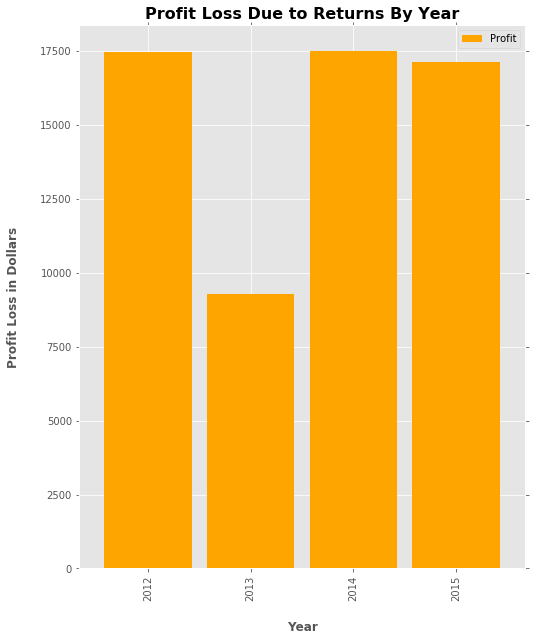

In [125]:
loss = profit_loss.plot(kind='bar', figsize=(8, 10), color='orange', zorder=2, width=0.85)

loss.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

loss.set_xlabel("Year", labelpad=20, weight='bold', size=12)

loss.set_ylabel("Profit Loss in Dollars", labelpad=20, weight='bold', size=12)

loss.set_title("Profit Loss Due to Returns By Year", weight='bold', size=16)

### *Question 2: How many customers returned more than once? More than 5 times?*

In [77]:
return_count = losses.groupby(['Customer.ID']).agg({'Returned':'count'})

In [76]:
one = return_count[return_count > 1].dropna()

In [74]:
len(one.index)

547

In [75]:
five = return_count[return_count > 5].dropna()
len(five.index)

46

**547 customers returned more than once, and 46 customers returned more than 5 times.**

### *Question 3: Which regions are more likely to return orders?*

In [102]:
losses = losses.rename(columns={'Region_x': 'Region'})
region_return = losses.groupby(['Region']).agg({'Returned':'count'})
region_return = region_return.sort_values(by=['Returned'])

Text(0.5, 1.0, 'Number of Returned Products by Region')

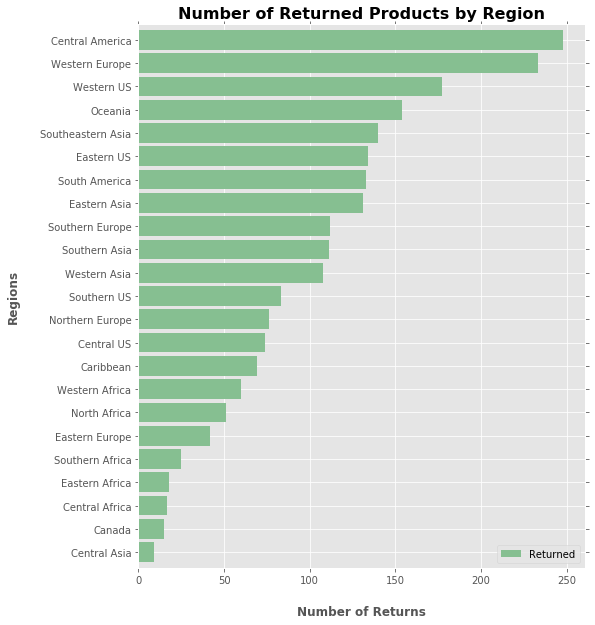

In [116]:
region_fig = region_return.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

region_fig.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

region_fig.set_xlabel("Number of Returns", labelpad=20, weight='bold', size=12)

region_fig.set_ylabel("Regions", labelpad=20, weight='bold', size=12)

region_fig.set_title("Number of Returned Products by Region", weight='bold', size=16)

### *Question 4: Which categories (sub-categories) of products are more likely to be returned?*

In [118]:
category_return = losses.groupby(['Category']).agg({'Returned':'count'})

Text(0.5, 1.0, 'Number of Products Returned by Category')

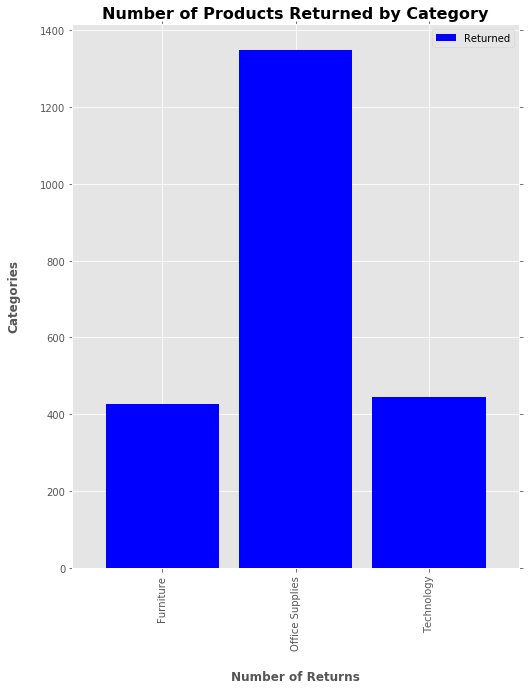

In [117]:
cat_fig = category_return.plot(kind='bar', figsize=(8, 10), color='blue', zorder=2, width=0.85)

cat_fig.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

cat_fig.set_xlabel("Number of Returns", labelpad=20, weight='bold', size=12)

cat_fig.set_ylabel("Categories", labelpad=20, weight='bold', size=12)

cat_fig.set_title("Number of Products Returned by Category", weight='bold', size=16)

In [112]:
subcategory_return = losses.groupby(['Sub.Category']).agg({'Returned':'count'})
subcategory_return = subcategory_return.sort_values(by=['Returned'])

Text(0.5, 1.0, 'Number of Products Returned in Each Subcatecory')

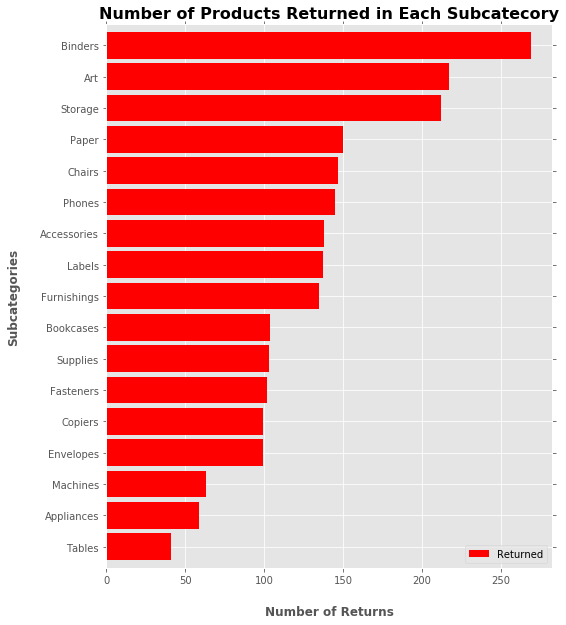

In [119]:
subcat_fig = subcategory_return.plot(kind='barh', figsize=(8, 10), color='red', zorder=2, width=0.85)

subcat_fig.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

subcat_fig.set_xlabel("Number of Returns", labelpad=20, weight='bold', size=12)

subcat_fig.set_ylabel("Subcategories", labelpad=20, weight='bold', size=12)

subcat_fig.set_title("Number of Products Returned in Each Subcatecory", weight='bold', size=16)

# Problem 4: Feature Engineering

### *Step 1: Create the Dependent Variable*

In [8]:
return1 = pd.read_csv('./data/Returns.csv')

In [42]:
or_merge = pd.merge(orders, return1, left_on=["Order.ID"], right_on=["Order ID"], how="left")

In [43]:
import numpy as np
or_merge['Returned'] = or_merge['Returned'].replace(np.nan, "No")

### *Step 2: New Feature - Process.Time*

In [44]:
or_merge['Order.Date'] = pd.to_datetime(or_merge['Order.Date'])
or_merge['Ship.Date'] = pd.to_datetime(or_merge['Ship.Date'])

In [45]:
or_merge['Process.Time_Days'] = (or_merge['Ship.Date'] - or_merge['Order.Date']).dt.days

### *Step 3: How many times product has been returned*

In [46]:
return_count = or_merge[or_merge["Returned"]=='Yes']\
.groupby(['Product.ID']).agg({'Returned':'count'})
return_count = return_count.reset_index()

In [47]:
return_count = return_count.rename(columns={'Returned': 'Num of Times Returned'})

In [48]:
or_merge = pd.merge(or_merge, return_count, on=["Product.ID"], how="left")

In [50]:
or_merge['Num of Times Returned'] = or_merge['Num of Times Returned'].replace(np.nan, 0)